# 2. SOCAT data visualization

----------

This script only uses data from SOCAT's North Pacific dataset––it does not include the Tropical Pacific (below 30 degrees latitude). It can be easily modified to include the Tropical Pacific, though.

My goal with this script was to explore different data visualizations.  I used Cartopy to overlay the coastlines on some of the graphs, then split the data by year and by month.

----------

Sydney Paige Kim 

Date Created: 07/07/2021

Last Edited: 08/20/2021

In [1]:
"""
If the notebook seems to "remember" something you typed and deleted, uncomment
this code and rerun the entire script. This restores default settings. It started
acting up on me a couple times, and I had to do this.

"""

#import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)

'\nIf the notebook seems to "remember" something you typed and deleted, uncomment\nthis code and rerun the entire script. This restores default settings. It started\nacting up on me a couple times, and I had to do this.\n\n'

## import SOCAT data

In [12]:
import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [13]:
df = pd.read_csv("SOCAT_data_North_America_Pacific.csv", engine = 'python')
df.head(10)    

Year  Month  Day  Hour    Lat        Lon  fCO2rec
0  1985      1   22     5  30.21  210.95000    321.7
1  1985      1   22     5  30.29  211.10001    324.2
2  1985      1   22     6  30.42  211.25000    322.2
3  1985      1   22     6  30.52  211.37000    320.9
4  1985      1   22     7  30.62  211.49001    319.4
5  1985      1   22    12  31.57  212.62000    322.6
6  1985      1   22    12  31.67  212.74001    320.2
7  1985      1   22    13  31.74  212.81000    322.2
8  1985      1   22    13  31.84  212.94000    321.1
9  1985      1   22    14  31.94  213.06000    320.2

In [14]:
df = pd.read_csv("SOCAT_data_North_Asian_Pacific_fco2_only.csv", engine = 'python')
df.head(10) 

Year  Month  Day  Hour    Lat     Lon  fCO2rec
0  2007      2   19     9  37.92  146.55  331.884
1  2007      2   19    12  37.92  146.55  332.650
2  2007      2   19    15  37.92  146.55  333.147
3  2007      2   19    18  37.92  146.55  333.507
4  2007      2   19    21  37.92  146.55  334.131
5  2007      2   20     0  37.92  146.55  339.250
6  2007      2   20     3  37.92  146.55  341.405
7  2007      2   20     6  37.92  146.55  341.709
8  2007      2   20     9  37.92  146.55  339.257
9  2007      2   20    12  37.92  146.55  342.966

In [15]:
np_SOCAT_America = np.genfromtxt("SOCAT_data_North_America_Pacific.csv",delimiter=',')
np_SOCAT_Asia = np.genfromtxt("SOCAT_data_North_Asian_Pacific_fco2_only.csv",delimiter=',')

In [16]:
np.argwhere(np_SOCAT_America[:,4]<=30.)

array([], shape=(0, 1), dtype=int64)

In [17]:
np.argwhere(np_SOCAT_America[:,4]>=30.)

array([[     1],
       [     2],
       [     3],
       ...,
       [372278],
       [372279],
       [372280]])

## merge and filter data

In [18]:
# I am filtering the SOCAT data to only include 2000-2019
# I wrote about this in more detail in 1_SOCAT_MATLAB_to_Python

np_SOCAT_unfiltered = np.concatenate((np_SOCAT_America,np_SOCAT_Asia[1:]),axis=0)

In [19]:
np.unique(np_SOCAT_unfiltered[1:,0])

array([1962., 1968., 1969., 1970., 1973., 1974., 1975., 1976., 1977.,
       1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
       1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995.,
       1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2015., 2016., 2017., 2018., 2019., 2020.])

In [20]:
years_to_remove = np.arange(1962.,2000.)
print(years_to_remove)

np_SOCAT = np.copy(np_SOCAT_unfiltered)     
# creating a copy of the dataset to remove these years

[1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973.
 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985.
 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997.
 1998. 1999.]


In [21]:
years_to_remove = np.append(years_to_remove, [2020.], axis=0)
print(years_to_remove)

[1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973.
 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985.
 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997.
 1998. 1999. 2020.]


In [22]:
for yr in years_to_remove:
    rows_to_remove = np.argwhere(np_SOCAT[:,0]==yr)
    np_SOCAT = np.delete(np_SOCAT,rows_to_remove,axis=0)

In [23]:
print(np.shape(np_SOCAT_unfiltered))
print(np.shape(np_SOCAT))

(836968, 7)
(696296, 7)


In [24]:
np.argwhere(np_SOCAT[:,0]==1999.)

array([], shape=(0, 1), dtype=int64)

## data overview

In [25]:
year = np_SOCAT[1:,0]
month = np_SOCAT[1:,1]
day = np_SOCAT[1:,2]
hour = np_SOCAT[1:,3]
lat = np_SOCAT[1:,4]
lon = np_SOCAT[1:,5]
fco2 = np_SOCAT[1:,6]

In [2]:
# here, I am changing the longitude values from a -180 to 180 degree range, to a 
# 0 to 360 degree range so we can see the Pacific Ocean in one piece (instead of
# split down the middle).


new_lon = []
for i in lon:
    if i > 180.:
        i = i - 360.
    new_lon.append(i)

NameError: name 'lon' is not defined

Total data points: 696295


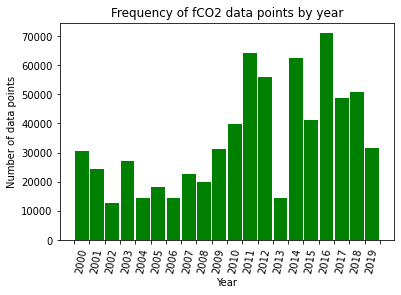

In [27]:
print("Total data points:", year.size)

bins = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
plt.xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, ' '], rotation=80, ha='left')


plt.hist(year,bins,histtype='bar',rwidth=0.9,color='g')

plt.xlabel('Year')
plt.ylabel('Number of data points')
plt.title('Frequency of fCO2 data points by year')

plt.show()

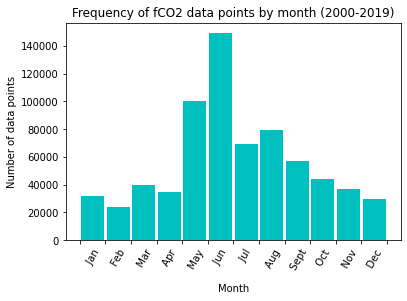

In [28]:
bins = [1,2,3,4,5,6,7,8,9,10,11,12,13]

plt.hist(month,bins,histtype='bar',rwidth=0.9,color='c')

plt.xlabel('Month')
plt.ylabel('Number of data points')
plt.title('Frequency of fCO2 data points by month (2000-2019)')

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13], ['   Jan', '   Feb', '   Mar', '   Apr', '   May', '   Jun', '   Jul', '   Aug', '   Sept', '   Oct', '   Nov', '   Dec',' '], rotation=60, ha='left')

plt.show()

In [29]:
import statistics

mean = np.mean(fco2)
median = np.median(fco2)
mode = statistics.mode(fco2)
min_ = np.min(fco2)  
max_ = np.max(fco2)
range_ = max_ - min_

print("Average fCO2 value:", mean)
print("Median fCO2 value:", median)
print("Most frequent fCO2 value:", mode)
print("Minimum fCO2 value:", min_)
print("Maximum fCO2 value:", max_)
print("Range of fCO2 values:", range_)

Average fCO2 value: 356.81067912881736
Median fCO2 value: 353.626
Most frequent fCO2 value: 358.658
Minimum fCO2 value: 161.236
Maximum fCO2 value: 678.019
Range of fCO2 values: 516.783


In [30]:
np_SOCAT_fco2 = np.column_stack((year,fco2))
print(np_SOCAT_fco2)

[[2001.     350.795]
 [2001.     351.833]
 [2001.     351.379]
 ...
 [2019.     354.196]
 [2019.     354.084]
 [2019.     354.877]]


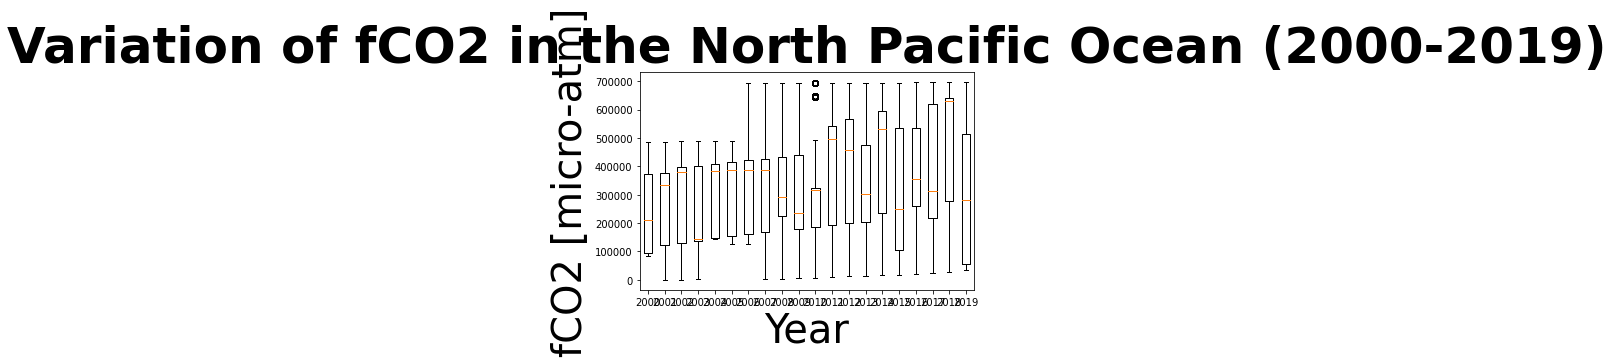

In [31]:
data_2000 = np.argwhere(np_SOCAT_fco2[:,0]==2000.)
data_2001 = np.argwhere(np_SOCAT_fco2[:,0]==2001.)
data_2002 = np.argwhere(np_SOCAT_fco2[:,0]==2002.)
data_2003 = np.argwhere(np_SOCAT_fco2[:,0]==2003.)
data_2004 = np.argwhere(np_SOCAT_fco2[:,0]==2004.)
data_2005 = np.argwhere(np_SOCAT_fco2[:,0]==2005.)
data_2006 = np.argwhere(np_SOCAT_fco2[:,0]==2006.)
data_2007 = np.argwhere(np_SOCAT_fco2[:,0]==2007.)
data_2008 = np.argwhere(np_SOCAT_fco2[:,0]==2008.)
data_2009 = np.argwhere(np_SOCAT_fco2[:,0]==2009.)
data_2010 = np.argwhere(np_SOCAT_fco2[:,0]==2010.)
data_2011 = np.argwhere(np_SOCAT_fco2[:,0]==2011.)
data_2012 = np.argwhere(np_SOCAT_fco2[:,0]==2012.)
data_2013 = np.argwhere(np_SOCAT_fco2[:,0]==2013.)
data_2014 = np.argwhere(np_SOCAT_fco2[:,0]==2014.)
data_2015 = np.argwhere(np_SOCAT_fco2[:,0]==2015.)
data_2016 = np.argwhere(np_SOCAT_fco2[:,0]==2016.)
data_2017 = np.argwhere(np_SOCAT_fco2[:,0]==2017.)
data_2018 = np.argwhere(np_SOCAT_fco2[:,0]==2018.)
data_2019 = np.argwhere(np_SOCAT_fco2[:,0]==2019.)
plt.boxplot ([data_2000.flatten(), data_2001.flatten(), data_2002.flatten(), data_2003.flatten(), data_2004.flatten(), data_2005.flatten(), data_2006.flatten(), data_2007.flatten(), data_2008.flatten(), data_2009.flatten(), data_2010.flatten(), data_2011.flatten(), data_2012.flatten(), data_2013.flatten(), data_2014.flatten(), data_2015.flatten(), data_2016.flatten(), data_2017.flatten(), data_2018.flatten(), data_2019.flatten()])

plt.title('Variation of fCO2 in the North Pacific Ocean (2000-2019)', size=50, weight='bold')
plt.xlabel('Year', size=40)
plt.ylabel('fCO2 [micro-atm]', size=40)

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
           
plt.show()

## data visualization

In [32]:
# restore default figure size
    
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]   

In [33]:
# set figure size for next figure 

plt.rcParams["figure.figsize"] = (20,10)  #(width, height)

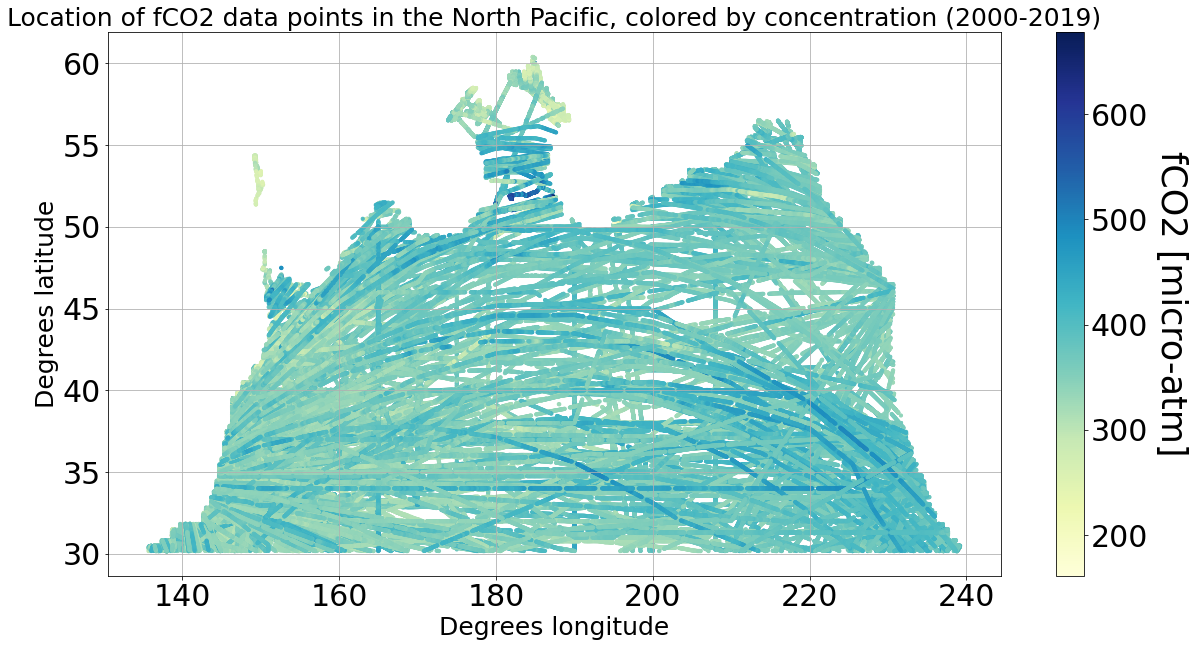

In [37]:
fig = plt.scatter(lon,lat,c=fco2,s=10,cmap='YlGnBu')

plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)  
plt.xlabel('Degrees longitude', fontsize = 25)
plt.ylabel('Degrees latitude', fontsize = 25)
plt.title('Location of fCO2 data points in the North Pacific, colored by concentration (2000-2019)', size=25)
plt.grid()

cbar = plt.colorbar()
# cbar.ax.set_yticklabels(['0','1','2','3'])
cbar.set_label('fCO2 [micro-atm]', rotation=270, fontsize=35, labelpad=40)

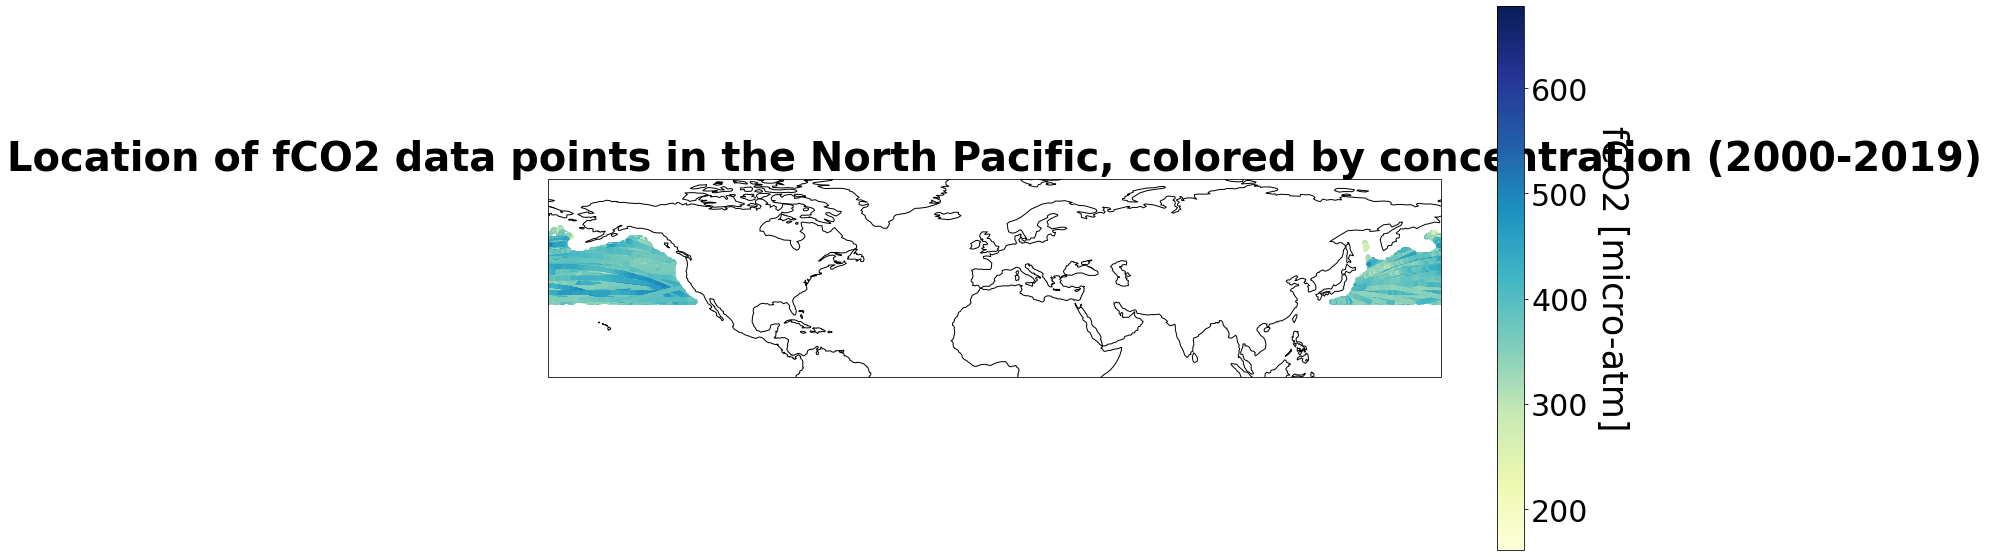

In [35]:
# here is the first time I use Cartopy. I wasn't able to get it to graph continuously

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax.coastlines()
ax.set_extent([-180, 180, 0, 80], crs=ccrs.PlateCarree())

fig = plt.scatter(lon,lat,c=fco2,s=10,cmap='YlGnBu')

plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)  
plt.xlabel('Degrees longitude', fontsize = 40)
plt.ylabel('Degrees latitude', fontsize = 40)
plt.title('Location of fCO2 data points in the North Pacific, colored by concentration (2000-2019)', size=40, weight='bold')
plt.grid()

cbar = plt.colorbar()
cbar.set_label('fCO2 [micro-atm]', rotation=270, fontsize=35, labelpad=40)

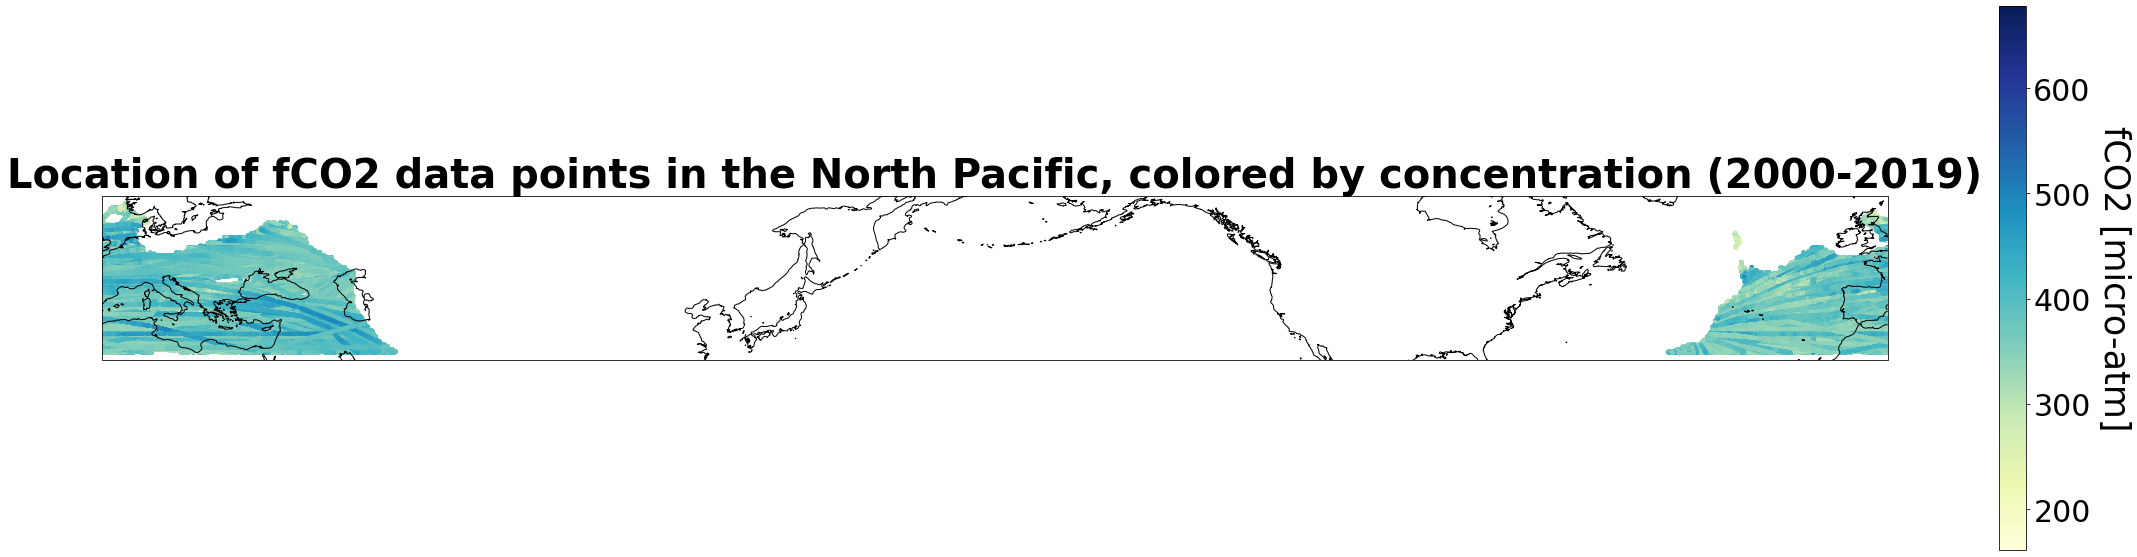

In [74]:
# here is my attempt to get the Ocean to graph continuously with Cartopy
# I gave up because I didn't think it was worth my time, but left the code in case 
# anyone would like to play with it.


ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()

fig = plt.scatter(new_lon,lat,c=fco2,s=10,cmap='YlGnBu')

plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)  
plt.xlabel('Degrees longitude', fontsize = 40)
plt.ylabel('Degrees latitude', fontsize = 40)
plt.title('Location of fCO2 data points in the North Pacific, colored by concentration (2000-2019)', size=40, weight='bold')
plt.grid()

cbar = plt.colorbar()
cbar.set_label('fCO2 [micro-atm]', rotation=270, fontsize=35, labelpad=40)

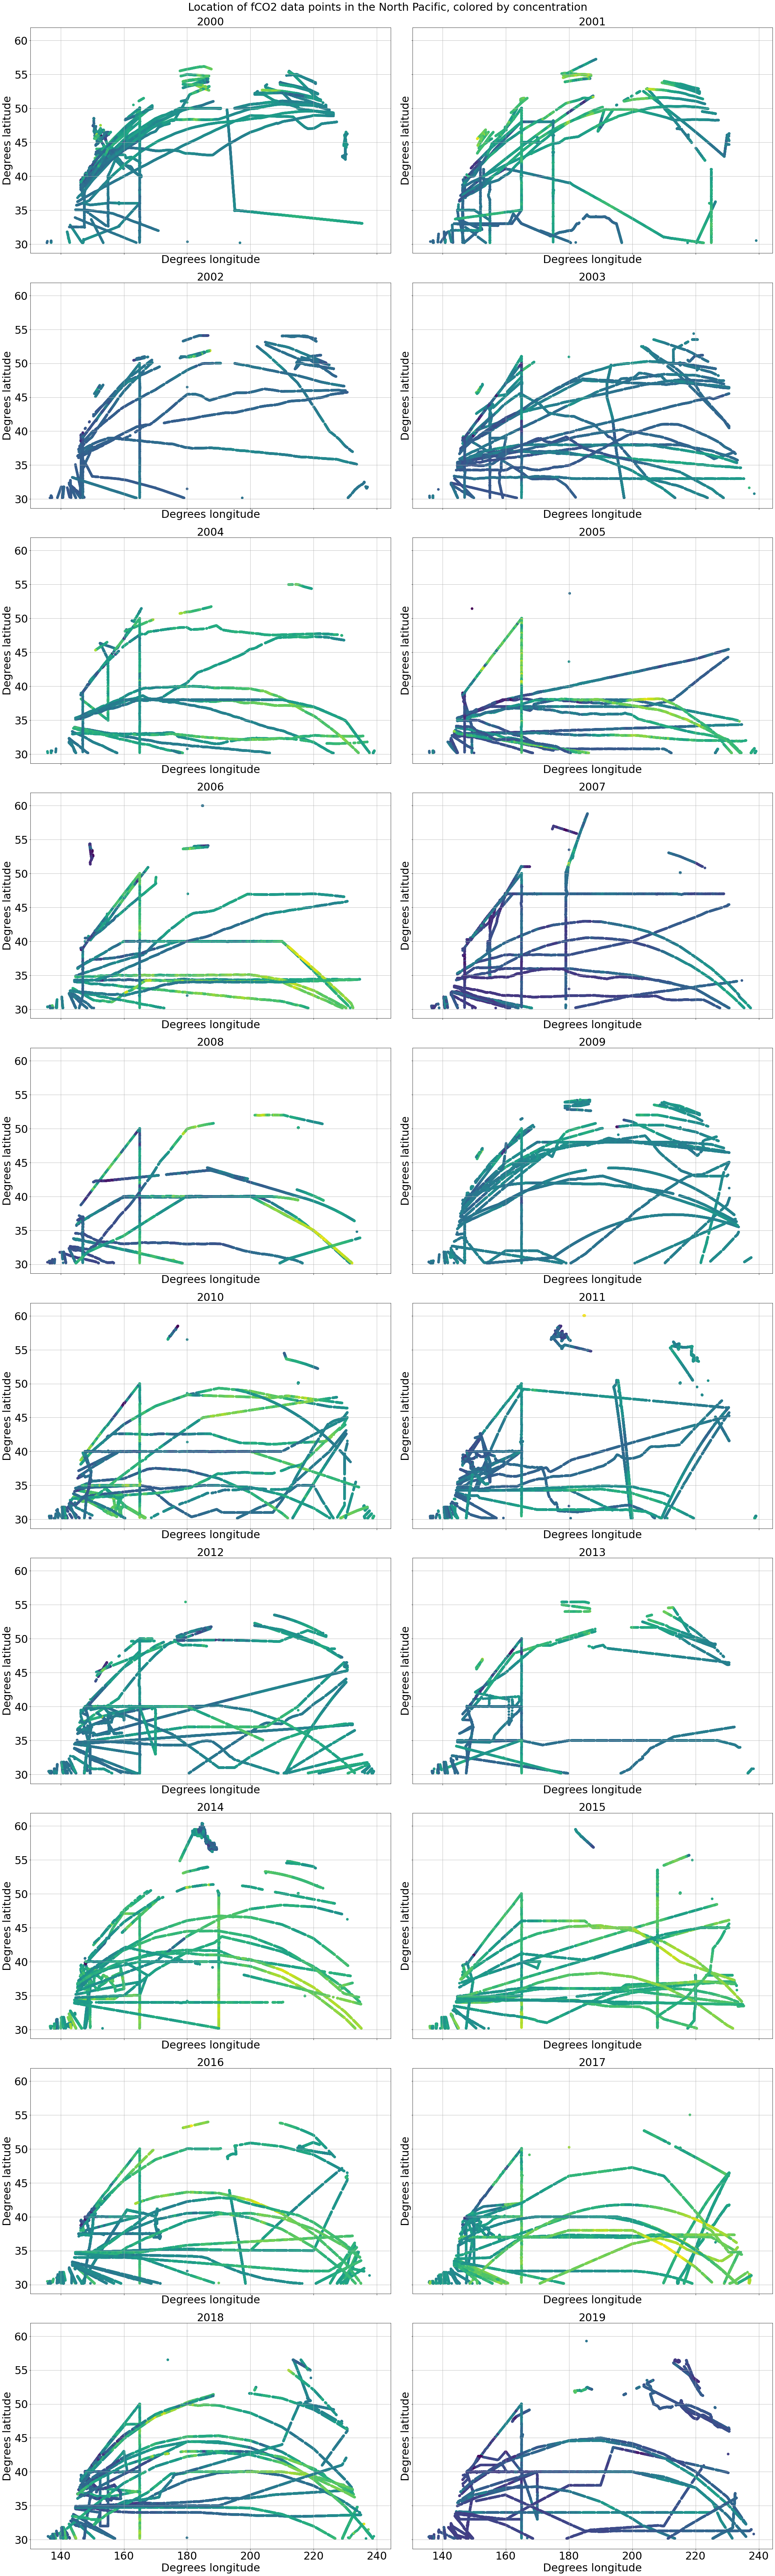

In [23]:
fig,ax = plt.subplots(ncols=2, nrows=10, constrained_layout=True, sharex=True, sharey=True)
fig.set_size_inches(30,100)
fig.suptitle("Location of fCO2 data points in the North Pacific, colored by concentration", fontsize=30)
years_to_plot = [2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.]
ax = ax.flatten()

i=0
for yr in years_to_plot:
    inds = np.where(np_SOCAT[:-1,0] == yr)
    ax[i].grid()
    ax[i].scatter(lon[inds],lat[inds],c=fco2[inds],s=40)
    ax[i].set_title(int(years_to_plot[i]), size=30)  
    ax[i].set_ylabel('Degrees latitude', fontsize=30) 
    ax[i].set_xlabel('Degrees longitude', fontsize=30) 
    i+=1

Text(0.5, 1.0, 'December')

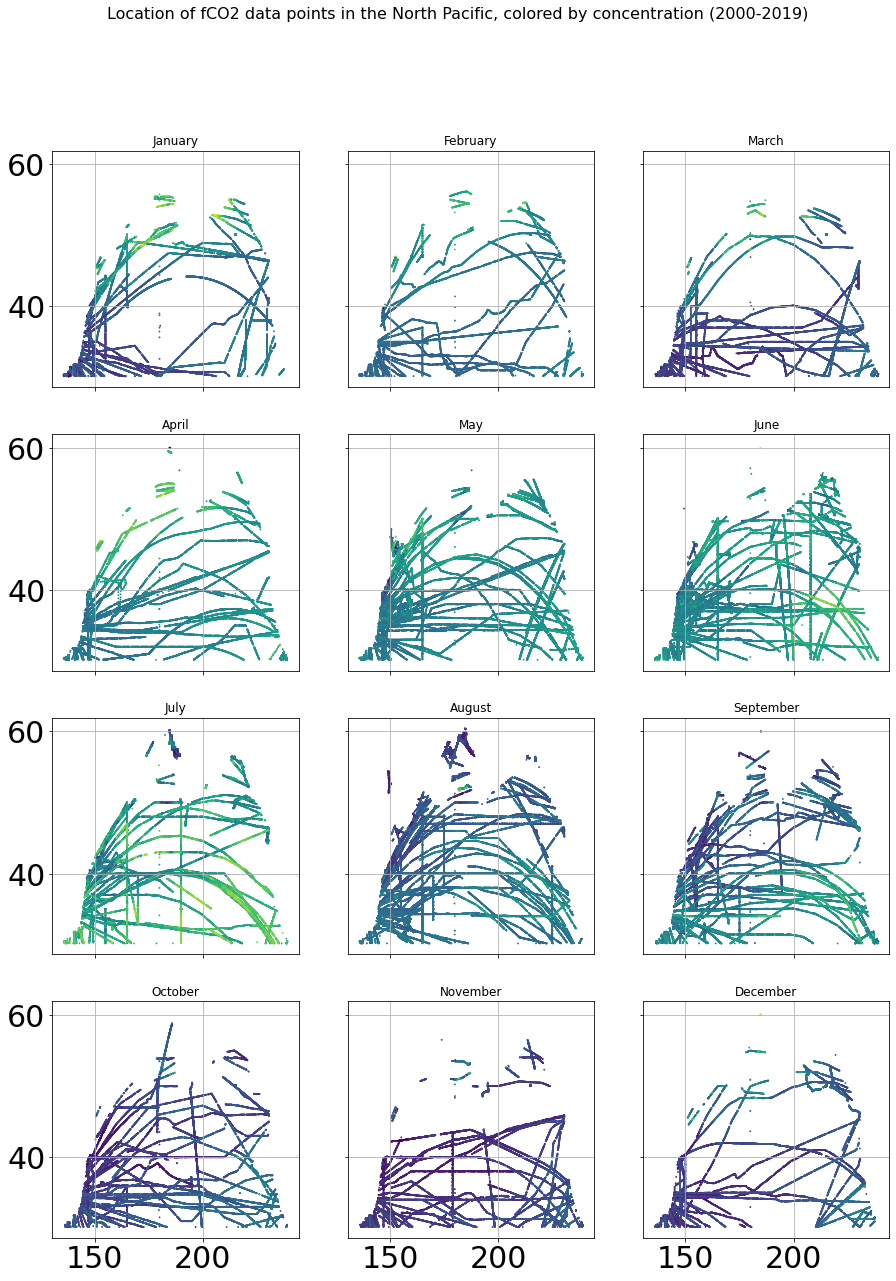

In [24]:
fig,ax = plt.subplots(ncols=3, nrows=4, sharex=True, sharey=True)
fig.set_size_inches(15,20)
fig.suptitle("Location of fCO2 data points in the North Pacific, colored by concentration (2000-2019)", fontsize=16)
months_to_plot = [1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.]
ax = ax.flatten()

i=0
for mnth in months_to_plot:
    ax[i].grid()
    inds = np.where(np_SOCAT[:-1,1] == mnth)
    ax[i].scatter(lon[inds],lat[inds],c=fco2[inds],s=0.7)
    i+=1

ax[0].set_title("January")
ax[1].set_title("February")
ax[2].set_title("March")
ax[3].set_title("April")
ax[4].set_title("May")
ax[5].set_title("June")
ax[6].set_title("July")
ax[7].set_title("August")
ax[8].set_title("September")
ax[9].set_title("October")
ax[10].set_title("November")
ax[11].set_title("December")